Importing the Dependencies

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os

Data Collection and Preprocessing

In [ ]:
#yfinance package calls yahoo finance api to get stock data and Ticker class to download price history for single symbol (GSPC)
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")# Query historical prices and set period to max to query data from the origin(creation) of index


In [ ]:
sp500.index = pd.to_datetime(sp500.index)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-27 00:00:00-04:00,4152.930176,4156.700195,4103.779785,4117.370117,4019500000,0.0,0.0
2023-10-30 00:00:00-04:00,4139.390137,4177.470215,4132.939941,4166.819824,3911140000,0.0,0.0
2023-10-31 00:00:00-04:00,4171.330078,4195.549805,4153.120117,4193.799805,4249470000,0.0,0.0


In [ ]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [ ]:
sp500.shape

(24076, 7)

In [ ]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24076 entries, 1927-12-30 00:00:00-05:00 to 2023-11-02 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24076 non-null  float64
 1   High          24076 non-null  float64
 2   Low           24076 non-null  float64
 3   Close         24076 non-null  float64
 4   Volume        24076 non-null  int64  
 5   Dividends     24076 non-null  float64
 6   Stock Splits  24076 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


In [ ]:
#Checking the number of missing values
sp500.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Sice there are no missing values there is no need for imputation or deletion (not recommended since it results in data loss)

Data Cleaning and Visualization

Text(0, 0.5, 'Closing Price')

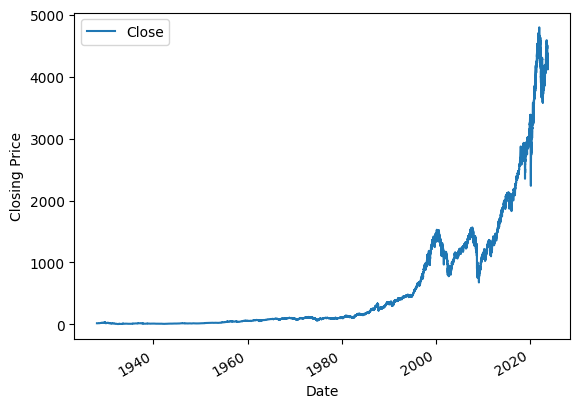

In [ ]:
#Plotting the dataset
sp500.plot.line(y="Close", use_index=True)
plt.xlabel("Date")  # X-axis label
plt.ylabel("Closing Price") # Y-axis label

In [ ]:
# Removing the columns which are not required for prediction
del sp500["Dividends"]
del sp500["Stock Splits"]

Setting up Target for ML Model

In [ ]:
# Create a new column called Tomorrow that shows tomorrow's price
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [ ]:
# Create a new column Target of integer type which tells whether the tomorrow's stock goes up or down and encoding the data
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-10-27 00:00:00-04:00,4152.930176,4156.700195,4103.779785,4117.370117,4019500000,4166.819824,1
2023-10-30 00:00:00-04:00,4139.390137,4177.470215,4132.939941,4166.819824,3911140000,4193.799805,1
2023-10-31 00:00:00-04:00,4171.330078,4195.549805,4153.120117,4193.799805,4249470000,4237.859863,1


In [ ]:
# Panda's local method to get data only after some index date to minimize excess data
sp500 = sp500.loc["1990-01-01":].copy()

Selecting and Implementing Machine Learning Model

In [ ]:
#Random Forest Classifier to deal with non-linear tendencies, run quickly and avoid over-fitting of the model.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
RandomForestClassifier(min_samples_split=100, random_state=1)

RandomForestClassifier(min_samples_split=100, random_state=1)

Evaluation of the Model

In [ ]:
# Measuring the accuracy
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.47058823529411764

<Axes: xlabel='Date'>

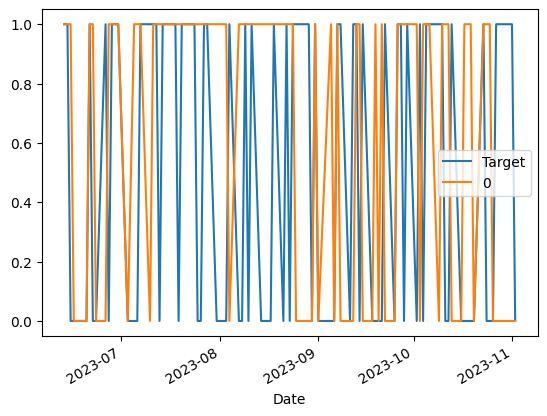

In [ ]:
#Plotting the combined 'actual and predicted values'
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

Improving the Model Performance by Back Testing

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
# Back testing function to update the dataset with the new predicted values i.e train the model with 10years of data and predict values for the 11th year, eventually train the model with the 11 years of data and predict values for the 12th year and so on.
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

0    3446
1    2580
Name: Predictions, dtype: int64

In [ ]:
# Measuring the accuracy
precision_score(predictions["Target"], predictions["Predictions"])

0.5275193798449612

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533355
0    0.466645
Name: Target, dtype: float64

In [ ]:
# Adding new predictors and setting up horizons to get 'rolling means' of the data in specified horizon and two new columns to take into consideration for predictions
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
# Removing rows with missing (NaN) values from the DataFrame.
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-27 00:00:00-04:00,4152.930176,4156.700195,4103.779785,4117.370117,4019500000,4166.819824,1,0.997594,0.0,0.984730,1.0,0.940485,26.0,0.986425,122.0,1.052643,526.0
2023-10-30 00:00:00-04:00,4139.390137,4177.470215,4132.939941,4166.819824,3911140000,4193.799805,1,1.005969,1.0,0.998956,2.0,0.952909,27.0,0.997990,123.0,1.064990,526.0
2023-10-31 00:00:00-04:00,4171.330078,4195.549805,4153.120117,4193.799805,4249470000,4237.859863,1,1.003227,2.0,1.008029,2.0,0.960267,27.0,1.004127,124.0,1.071585,526.0


In [ ]:
# Increasing the estimators value for better accuracy and decresing min_samples_split to avoid over fitting
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
# Setting up new thresh-hold to greater than 0.5 to say that there is more than 50% chance that the predicted stock price is true and considering probability values of predictors
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
# Back tesing with new predictors
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    4201
1.0     825
Name: Predictions, dtype: int64

In [ ]:
#Measuring the accuracy of the improved model
precision_score(predictions["Target"], predictions["Predictions"])

0.5709090909090909

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.542977
0    0.457023
Name: Target, dtype: float64

In [ ]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-10-27 00:00:00-04:00,1,0.0
2023-10-30 00:00:00-04:00,1,1.0
2023-10-31 00:00:00-04:00,1,0.0
